<a href="https://colab.research.google.com/github/WolfgangNS/OpenSNP-dendrogram/blob/main/OpenSNP_dendrogram_data_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# ChatGPT conversations:
# https://chatgpt.com/c/682ccc67-b81c-8007-af7d-770e759864f0
# https://chatgpt.com/c/682fd3c5-000c-8007-afea-13a2ec9e6ba5

# Original github R code:
# https://github.com/WolfgangNS/OpenSNP-dendrogram/blob/main/dendrogram.r
# https://stackoverflow.com/a/52517178/13903606

# Example page archive:
# https://web.archive.org/web/20250404085531/https://opensnp.org/users/5818

# Next to-do:
# include tooltip on hover
# https://plotly.com/python/hover-text-and-formatting/

### List of download links

In [4]:
pages = """https://opensnp.org/data/5811.23andme.4287
https://opensnp.org/data/5817.23andme.4293
https://opensnp.org/data/5818.23andme.4294
https://opensnp.org/data/5820.23andme.4298
https://opensnp.org/data/5821.23andme.4300
https://opensnp.org/data/5823.23andme.4302
https://opensnp.org/data/5825.23andme.4303
https://opensnp.org/data/5830.23andme.4308
https://opensnp.org/data/5831.23andme.4309
https://opensnp.org/data/5832.23andme.4310
https://opensnp.org/data/5833.23andme.4311
https://opensnp.org/data/5839.23andme.4319
https://opensnp.org/data/5841.23andme.4321
https://opensnp.org/data/5847.23andme.4325
https://opensnp.org/data/5848.23andme.4326
https://opensnp.org/data/5850.23andme.4328
https://opensnp.org/data/5853.23andme.4332
https://opensnp.org/data/5861.23andme.4337
https://opensnp.org/data/5862.23andme.4338
https://opensnp.org/data/5863.23andme.4339
https://opensnp.org/data/5865.23andme.4341
https://opensnp.org/data/5866.23andme.4342
https://opensnp.org/data/5871.23andme.4347
https://opensnp.org/data/5872.23andme.4348
https://opensnp.org/data/5876.23andme.4350
https://opensnp.org/data/5878.23andme.4352
https://opensnp.org/data/5879.23andme.4353
https://opensnp.org/data/5881.23andme.4355
https://opensnp.org/data/5882.23andme.4356
https://opensnp.org/data/5884.23andme.4358
https://opensnp.org/data/5892.23andme.4364
https://opensnp.org/data/5892.23andme.9731
https://opensnp.org/data/5892.23andme.9983
https://opensnp.org/data/5900.23andme.4370
https://opensnp.org/data/5902.23andme.4372
https://opensnp.org/data/5902.23andme.4842
https://opensnp.org/data/5909.23andme.4379
https://opensnp.org/data/5914.23andme.4384
https://opensnp.org/data/5916.23andme.4385
https://opensnp.org/data/5917.23andme.4386
https://opensnp.org/data/5918.23andme.4387
https://opensnp.org/data/5920.23andme.4388
https://opensnp.org/data/5924.23andme.4389
https://opensnp.org/data/5937.23andme.4409
https://opensnp.org/data/5941.23andme.4422
https://opensnp.org/data/5941.23andme.4423
https://opensnp.org/data/5941.23andme.4424
https://opensnp.org/data/5960.23andme.4478
https://opensnp.org/data/5973.23andme.4485
https://opensnp.org/data/5977.23andme.4493
https://opensnp.org/data/5978.23andme.4494
https://opensnp.org/data/5979.23andme.4495
https://opensnp.org/data/5983.23andme.4497
https://opensnp.org/data/5987.23andme.4502
https://opensnp.org/data/5989.23andme.4503
https://opensnp.org/data/5991.23andme.4504
https://opensnp.org/data/5995.23andme.4505
https://opensnp.org/data/5999.23andme.4508
https://opensnp.org/data/6000.23andme.4510
https://opensnp.org/data/6001.23andme.4511
https://opensnp.org/data/6004.23andme.4512
https://opensnp.org/data/6004.23andme.6222
https://opensnp.org/data/6005.23andme.4513
https://opensnp.org/data/6013.23andme.4516
https://opensnp.org/data/6017.23andme.4518
https://opensnp.org/data/6020.23andme.4519
https://opensnp.org/data/6020.23andme.4554
https://opensnp.org/data/6023.23andme.4521
https://opensnp.org/data/6025.23andme.4522
https://opensnp.org/data/6028.23andme.4525
https://opensnp.org/data/6031.23andme.4527
https://opensnp.org/data/6034.23andme.4528
https://opensnp.org/data/6036.23andme.4530
https://opensnp.org/data/6043.23andme.4536
https://opensnp.org/data/6043.23andme.4537
https://opensnp.org/data/6043.23andme.4538
https://opensnp.org/data/6060.23andme.4565"""

### 1. Download files from archive.org

In [2]:
# https://dev.to/kojix2/ruby-kernel-in-google-colaboratory-32ni
!apt-get install ruby-dev
!sudo apt install libtool libffi-dev ruby ruby-dev make
!sudo apt install libzmq3-dev libczmq-dev
!gem install ffi-rzmq rake
!gem install specific_install
!gem specific_install https://github.com/SciRuby/iruby
!iruby register

!gem install wayback_machine_downloader

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-lato libgmp-dev libgmpxx4ldbl libruby3.0 rake ruby ruby-net-telnet
  ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0 ruby3.0-dev ruby3.0-doc
  rubygems-integration
Suggested packages:
  gmp-doc libgmp10-doc libmpfr-dev ri bundler
The following NEW packages will be installed:
  fonts-lato libgmp-dev libgmpxx4ldbl libruby3.0 rake ruby ruby-dev
  ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0 ruby3.0-dev
  ruby3.0-doc rubygems-integration
0 upgraded, 15 newly installed, 0 to remove and 34 not upgraded.
Need to get 10.7 MB of archives.
After this operation, 58.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-lato all 2.0-2.1 [2,696 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgmpxx4ldbl amd64 2:6.2.1+dfsg-3ubuntu1 [9,580 B]
Get:3 http://archive.u

In [5]:
# haven't tested this downloader yet, but it looks promising
# note: this puts it in /content/data

import os
import time

for url in pages.splitlines():
    expected_file_path = f"/content/data/{url.split('/')[-1]}"
    i = 1
    while not os.path.exists(expected_file_path) and i<=5:
        print(f"Attempt {i} at downloading {url}")
        # wayback download code here
        os.system(f"wayback_machine_downloader \"{url}\" -p 1 --exact-url -d \"/content/\"")
        i+=1
        time.sleep(5)
    # Optional: Add a check here to see if the file was successfully downloaded after the loop
    if not os.path.exists(expected_file_path):
        print(f"Failed to download {url} after 5 attempts.")

Attempt 1 at downloading https://opensnp.org/data/5811.23andme.4287
Attempt 1 at downloading https://opensnp.org/data/5817.23andme.4293
Attempt 1 at downloading https://opensnp.org/data/5818.23andme.4294
Attempt 1 at downloading https://opensnp.org/data/5820.23andme.4298
Attempt 1 at downloading https://opensnp.org/data/5821.23andme.4300
Attempt 1 at downloading https://opensnp.org/data/5823.23andme.4302
Attempt 1 at downloading https://opensnp.org/data/5825.23andme.4303
Attempt 2 at downloading https://opensnp.org/data/5825.23andme.4303
Attempt 1 at downloading https://opensnp.org/data/5830.23andme.4308
Attempt 1 at downloading https://opensnp.org/data/5831.23andme.4309
Attempt 2 at downloading https://opensnp.org/data/5831.23andme.4309
Attempt 1 at downloading https://opensnp.org/data/5832.23andme.4310
Attempt 1 at downloading https://opensnp.org/data/5833.23andme.4311
Attempt 1 at downloading https://opensnp.org/data/5839.23andme.4319
Attempt 1 at downloading https://opensnp.org/dat

In [6]:
import os
import time
from pathlib import Path

# Ensure destination directory exists
os.makedirs("/content/users", exist_ok=True)

# Get all .23andme.* genotype files in /content/data
genotype_files = sorted(Path("/content/data").glob("*.23andme.*"))

for file_path in genotype_files:
    user_id = file_path.name.split('.')[0]  # Get the ID before the first dot
    url = f"https://opensnp.org/users/{user_id}"
    output_file = f"/content/users/{user_id}/index.html"

    if os.path.exists(output_file):
        print(f"Already downloaded: {user_id}")
        continue

    for i in range(1, 6):  # Retry up to 5 times
        print(f"Attempt {i} downloading {url}")
        ret = os.system(f'wayback_machine_downloader "{url}" -p 1 --exact-url -d "/content/"')
        if os.path.exists(f"/content/users/{user_id}/index.html") or ret == 0:
            break
        time.sleep(5)

    if not os.path.exists(f"/content/users/{user_id}/index.html"):
        print(f"❌ Failed to download user page for ID {user_id} after 5 attempts.")


Attempt 1 downloading https://opensnp.org/users/5811
Attempt 1 downloading https://opensnp.org/users/5817
Attempt 1 downloading https://opensnp.org/users/5818
❌ Failed to download user page for ID 5818 after 5 attempts.
Attempt 1 downloading https://opensnp.org/users/5820
Attempt 2 downloading https://opensnp.org/users/5820
Attempt 1 downloading https://opensnp.org/users/5821
Attempt 1 downloading https://opensnp.org/users/5823
Attempt 1 downloading https://opensnp.org/users/5825
Attempt 1 downloading https://opensnp.org/users/5830
Attempt 1 downloading https://opensnp.org/users/5831
Attempt 1 downloading https://opensnp.org/users/5832
Attempt 1 downloading https://opensnp.org/users/5833
Attempt 1 downloading https://opensnp.org/users/5839
Attempt 1 downloading https://opensnp.org/users/5841
Attempt 1 downloading https://opensnp.org/users/5847
Attempt 1 downloading https://opensnp.org/users/5848
Attempt 1 downloading https://opensnp.org/users/5850
Attempt 1 downloading https://opensnp.

In [7]:
#because the Wayback downloader has a stupid file hierarchy it makes on its own, I'm doing this instead:

import os, shutil

base = '/content/users'
for name in os.listdir(base):
    path = os.path.join(base, name, 'index.html')
    if os.path.isfile(path):
        shutil.move(path, os.path.join(base, f'{name}.html'))
        os.rmdir(os.path.join(base, name))

In [12]:
## Restart because I messed up the file names

import os

directory = '/content/data/'

for filename in os.listdir(directory):
    if '_' in filename:
        parts = filename.split('_')
        new_filename = parts[-1]
        old_filepath = os.path.join(directory, filename)
        new_filepath = os.path.join(directory, new_filename)

        # Check if the new filename already exists to avoid overwriting
        if os.path.exists(new_filepath):
            print(f"Skipping renaming {filename} as {new_filename} already exists.")
        else:
            os.rename(old_filepath, new_filepath)
            print(f"Renamed {filename} to {new_filename}")

Renamed Tallon_5892.23andme.4364 to 5892.23andme.4364
Renamed Southernsmash_5987.23andme.4502 to 5987.23andme.4502
Renamed Tallon_5892.23andme.9731 to 5892.23andme.9731
Renamed Alain_Page_5941.23andme.4423 to 5941.23andme.4423
Renamed Jaclyn_Jordan_5902.23andme.4842 to 5902.23andme.4842
Renamed Faelyn_6034.23andme.4528 to 6034.23andme.4528
Renamed Sarah_5916.23andme.4385 to 5916.23andme.4385
Renamed Tallon_5892.23andme.9983 to 5892.23andme.9983
Renamed Amber_Thompson_5960.23andme.4478 to 5960.23andme.4478
Renamed Jeremiah_Snow_5924.23andme.4389 to 5924.23andme.4389
Renamed Andrei_Gatea_5817.23andme.4293 to 5817.23andme.4293
Renamed Alan_Williams_5861.23andme.4337 to 5861.23andme.4337
Renamed Alain_Page_5941.23andme.4424 to 5941.23andme.4424
Renamed Hannah_Lerner_5881.23andme.4355 to 5881.23andme.4355
Renamed Nate_S_5853.23andme.4332 to 5853.23andme.4332
Renamed Nicole_Gomez_5841.23andme.4321 to 5841.23andme.4321
Renamed Dean_Miller_5884.23andme.4358 to 5884.23andme.4358
Renamed Renee_M

In [13]:
import os
from pathlib import Path
from lxml import html
import re
from shutil import move

user_dir = Path("/content/users")
data_dir = Path("/content/data")

for user_file in user_dir.glob("*.html"):
    user_id = user_file.stem  # e.g., "5811"

    try:
        # Parse HTML
        with open(user_file, "r", encoding="utf-8") as f:
            tree = html.parse(f)

        try:
            full_name = tree.xpath("//h3[1]")[0].text_content()
            # Remove "'s page" and clean up name
            clean_name = full_name.replace("'s page", "").strip()
            clean_name = re.sub(r"[^\w\s]", "", clean_name)  # Remove punctuation
            clean_name = re.sub(r"\s+", "_", clean_name)     # Convert spaces to underscores
        except IndexError:
            print(f"Failed to extract name from {user_file.name}")
            continue

        # Find genotype files starting with this ID
        for geno_file in data_dir.glob(f"{user_id}*"):
            new_name = f"{clean_name}_{geno_file.name}"
            new_path = geno_file.with_name(new_name)
            print(f"Renaming {geno_file.name} -> {new_name}")
            move(str(geno_file), new_path)

    except Exception as e:
        print(f"Error processing {user_file.name}: {e}")
        continue


Renaming 5865.23andme.4341 -> gil_5865.23andme.4341
Renaming 5937.23andme.4409 -> James_McDonnell_5937.23andme.4409
Renaming 5871.23andme.4347 -> Bruce_5871.23andme.4347
Renaming 5847.23andme.4325 -> kris_5847.23andme.4325
Renaming 5861.23andme.4337 -> Alan_Williams_5861.23andme.4337
Renaming 5879.23andme.4353 -> Wendy_5879.23andme.4353
Renaming 6060.23andme.4565 -> Amanda_6060.23andme.4565
Renaming 5989.23andme.4503 -> David_Etifier_5989.23andme.4503
Renaming 6034.23andme.4528 -> Faelyn_6034.23andme.4528
Renaming 5817.23andme.4293 -> Andrei_Gatea_5817.23andme.4293
Renaming 5909.23andme.4379 -> Renee_Meehan_5909.23andme.4379
Renaming 6005.23andme.4513 -> Bill_Fraser_6005.23andme.4513
Renaming 5830.23andme.4308 -> April_5830.23andme.4308
Renaming 5862.23andme.4338 -> melanie_owen_5862.23andme.4338
Renaming 5916.23andme.4385 -> Sarah_5916.23andme.4385
Renaming 5924.23andme.4389 -> Jeremiah_Snow_5924.23andme.4389
Renaming 5892.23andme.9731 -> Tallon_5892.23andme.9731
Renaming 5892.23andme

### 2. Merge into VCF

In [14]:
# https://github.com/arrogantrobot/23andme2vcf
!git clone https://github.com/arrogantrobot/23andme2vcf.git

Cloning into '23andme2vcf'...
remote: Enumerating objects: 173, done.
remote: Total 173 (delta 0), reused 0 (delta 0), pack-reused 173 (from 1)
Receiving objects: 100% (173/173), 29.78 MiB | 27.50 MiB/s, done.
Resolving deltas: 100% (74/74), done.
Encountered 3 file(s) that should have been pointers, but weren't:
	23andme_v3_hg19_ref.txt.gz
	23andme_v4_hg19_ref.txt.gz
	23andme_v5_hg19_ref.txt.gz


In [15]:
!rm -f \
    /content/data/*5941.23andme.4423 \
    /content/data/*5941.23andme.4422 \
    /content/data/*6043.23andme.4536 \
    /content/data/*6043.23andme.4537 \
    /content/data/*6020.23andme.4554 \
    /content/data/*5937.23andme.4409

# these files are in a compressed format, should be handled differently
# but I'm deleting them for now
# more samples that have dupes: 5892 5902 6004 6020

In [16]:
%cd /content/23andme2vcf/
import os

input_dir = "/content/data/"
output_dir = "/content/vcf/"

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

for filename in os.listdir(input_dir):
    input_file = os.path.join(input_dir, filename)
    output_file = os.path.join(output_dir, filename + ".vcf")
    !perl 23andme2vcf.pl "$input_file" "$output_file"

/content/23andme2vcf
63679 sites were not included; these unmatched references can be found in sites_not_in_reference.txt.Try running again, but specify the other reference version:
./23andme2vcf.pl /content/data/Tallon_5892.23andme.4364 /content/vcf/Tallon_5892.23andme.4364.vcf 4
63279 sites were not included; these unmatched references can be found in sites_not_in_reference.txt.Try running again, but specify the other reference version:
./23andme2vcf.pl /content/data/Southernsmash_5987.23andme.4502 /content/vcf/Southernsmash_5987.23andme.4502.vcf 4
63947 sites were not included; these unmatched references can be found in sites_not_in_reference.txt.Try running again, but specify the other reference version:
./23andme2vcf.pl /content/data/Tallon_5892.23andme.9731 /content/vcf/Tallon_5892.23andme.9731.vcf 4
63532 sites were not included; these unmatched references can be found in sites_not_in_reference.txt.Try running again, but specify the other reference version:
./23andme2vcf.pl /con

In [ ]:
# https://samtools.github.io/bcftools/howtos/install.html

In [17]:
%cd /content/
!git clone --recurse-submodules https://github.com/samtools/htslib.git
!git clone https://github.com/samtools/bcftools.git
%cd bcftools
 # The following is optional:
 #   autoheader && autoconf && ./configure --enable-libgsl --enable-perl-filters
!make

/content
Cloning into 'htslib'...
remote: Enumerating objects: 17599, done.
remote: Counting objects: 100% (162/162), done.
remote: Compressing objects: 100% (93/93), done.
remote: Total 17599 (delta 98), reused 73 (delta 69), pack-reused 17437 (from 3)
Receiving objects: 100% (17599/17599), 13.22 MiB | 17.96 MiB/s, done.
Resolving deltas: 100% (12686/12686), done.
Submodule 'htscodecs' (https://github.com/samtools/htscodecs.git) registered for path 'htscodecs'
Cloning into '/content/htslib/htscodecs'...
remote: Enumerating objects: 2280, done.        
remote: Counting objects: 100% (573/573), done.        
remote: Compressing objects: 100% (98/98), done.        
remote: Total 2280 (delta 512), reused 484 (delta 475), pack-reused 1707 (from 2)        
Receiving objects: 100% (2280/2280), 20.58 MiB | 16.99 MiB/s, done.
Resolving deltas: 100% (1627/1627), done.
Submodule path 'htscodecs': checked out 'ce66e5f303862aad325e4df908636a31c877b4d8'
Cloning into 'bcftools'...
remote: Enumeratin

In [18]:
%cd /content/
!curl -Ls https://micro.mamba.pm/api/micromamba/linux-64/latest | tar -xvj bin/micromamba
# Create a new environment called 'genomics' and install tabix
!bin/micromamba shell init -s bash -p /env
!bin/micromamba create -y -p /env -c bioconda -c conda-forge tabix

/content
bin/micromamba
The following argument was not expected: -p
Run with --help for more information.
[+] 0.0s
[+] 0.1s
bioconda/noarch (c..  ⣾  [+] 0.0s
[+] 0.1s
bioconda/linux-64     ⣾  
bioconda/noarch       ⣾  
conda-forge/linux-64  ⣾  
conda-forge/noarch     1%[+] 0.2s
bioconda/linux-64     10%
bioconda/noarch       31%
conda-forge/linux-64   2%
conda-forge/noarch    10%[+] 0.3s
bioconda/linux-64     17%
bioconda/noarch       39%
conda-forge/linux-64   3%
conda-forge/noarch    11%[+] 0.4s
bioconda/linux-64     35%
bioconda/noarch       57%
conda-forge/linux-64   6%
conda-forge/noarch    16%[+] 0.5s
bioconda/linux-64     45%
bioconda/noarch       68%
conda-forge/linux-64   7%
conda-forge/noarch    20%[+] 0.6s
bioconda/linux-64     66%
bioconda/noarch       90%
conda-forge/linux-64   9%
conda-forge/noarch    24%[+] 0.7s
bioconda/linux-64     77%
bioconda/noarch      100%
conda-forge/linux-64  10%
conda-forge/noarch    25%[+] 0.8s
bioconda/linux-64     77%
bioconda/noarch      10

In [19]:
import glob
import subprocess

for vcf in glob.glob("/content/vcf/*.vcf"):
    subprocess.run(["/env/bin/bgzip", vcf], check=True)
    # subprocess.run(["/env/bin/tabix", "-p", "vcf", f"{vcf}.gz"], check=True)

In [20]:
# names each sample by its filename
%cd /content/

import glob
import os

for vcf in sorted(glob.glob("/content/vcf/*.vcf.gz")):
    # New sample name from filename
    new_sample = os.path.splitext(os.path.basename(vcf))[0]
    new_sample = new_sample.replace(".", "_")

    # Write the desired sample name to a temporary header
    header_file = "new_header.txt"
    with open(header_file, "w") as f:
        f.write(new_sample + "\n")  # one line, one sample name

    # Reheader: add this sample name to a VCF with none
    out_vcf = vcf.replace(".vcf.gz", ".renamed.vcf.gz")
    os.system(f"bcftools/bcftools reheader -s {header_file} -o {out_vcf} {vcf}")

/content


In [21]:
for vcf in sorted(glob.glob("/content/vcf/*.renamed.vcf.gz")):
    subprocess.run(["bcftools/bcftools", "index", vcf], check=True)

In [22]:
%cd /content/
!bcftools/bcftools merge /content/vcf/*.renamed.vcf.gz -Oz -o merged.vcf.gz

/content


In [23]:
!gunzip -k merged.vcf.gz

### 3. Generate circular dendrogram with R

In [24]:
!pip install -q rpy2
%load_ext rpy2.ipython

In [25]:
# this is needed to compile C libraries that bioconductor libraries depend on
!apt-get update
!apt-get install -y libcurl4-openssl-dev libssl-dev libxml2-dev zlib1g-dev libbz2-dev liblzma-dev libncurses5-dev libncursesw5-dev libreadline-dev

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,683 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,968 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,552 kB]
Get:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Get:13 http://archive.ubuntu

In [26]:
## the following takes 5min
%%R
install.packages(c("ggplot2","BiocManager"))
install.packages(c("circlize", "dendextend")) # needed for graphics later
BiocManager::install(c("SNPRelate","gdsfmt"))

Update all/some/none? [a/s/n]: n


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/ggplot2_3.5.2.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/BiocManager_1.30.25.tar.gz'

The downloaded source packages are in
	‘/tmp/Rtmpq8ikHh/downloaded_packages’
Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘gridExtra’, ‘GlobalOptions’, ‘shape’, ‘colorspace’, ‘viridis’

trying URL 'https://cran.rstudio.com/src/contrib/gridExtra_2.3.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/GlobalOptions_0.1.2.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/shape_1.4.6.1.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/colorspace_2.1-1.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/viridis_0.6.5.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/circlize_0.4.16.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/dendextend_1.19.0.tar.gz'

In [67]:
# Reset gds file
!rm -f data.gds data.gds.lock

In [68]:
%%R
try({
  snpgdsClose(genofile)
}, silent = TRUE)

if (file.exists("data.gds")) {
  unlink("data.gds")
}

In [28]:
%%R
library(gdsfmt)
library(SNPRelate)
library(ggplot2)

vcf.fn <- "merged.vcf"
snpgdsVCF2GDS(vcf.fn, "data.gds", method ="biallelic.only", verbose=TRUE)
genofile<-snpgdsOpen("data.gds")
set.seed(100)
ibs.hc<-snpgdsHCluster(snpgdsIBS(genofile,num.thread=2, autosome.only=FALSE))
rv <- snpgdsCutTree(ibs.hc)

Start file conversion from VCF to SNP GDS ...
Method: extracting biallelic SNPs
Number of samples: 71
Parsing "merged.vcf" ...
	import 509103 variants.
+ genotype   { Bit2 71x509103, 8.6M } *
Optimize the access efficiency ...
Clean up the fragments of GDS file:
    open the file 'data.gds' (11.6M)
    # of fragments: 155
    save to 'data.gds.tmp'
    rename 'data.gds.tmp' (11.6M, reduced: 1.6K)
    # of fragments: 20
Identity-By-State (IBS) analysis on genotypes:
Excluding 3,227 SNPs (monomorphic: TRUE, MAF: NaN, missing rate: NaN)
    # of samples: 71
    # of SNPs: 505,876
    using 2 threads
IBS:    the sum of all selected genotypes (0,1,2) = 44455671
Sat May 24 21:51:00 2025    (internal increment: 65536)
[==================================================] 100%, completed, 0s
Sat May 24 21:51:00 2025    Done.
Determine groups by permutation (Z threshold: 15, outlier threshold: 5):
Create 1 groups.


In [31]:
%%R
library(dendextend)
library(circlize)

# Create dendrogram
dend1 <- rv$dendrogram
dend2 <- rank_branches(dend1)

# Save to SVG
svg("/content/dendrogram.svg", width = 10, height = 10)
par(cex = 0.5)
circlize_dendrogram(dend2)
dev.off()

png 
  2 


In [68]:
%%R
library(dendextend)
library(circlize)

# Create dendrogram
dend1 <- rv$dendrogram
dend2 <- rank_branches(dend1)

# Count the number of leaves (samples)
num_leaves <- nleaves(dend2)

# Save to SVG with larger canvas and outer space
svg("/content/dendrogram.svg", width = 12, height = 12)
par(cex = 0.5)

# Clear any previous circlize state
circos.clear()

# Set circlize parameters with more space for labels
circos.par(
  canvas.xlim = c(-1.4, 1.4),                # zoom out
  canvas.ylim = c(-1.4, 1.4)
)

# Draw the circular dendrogram
circlize_dendrogram(dend2)

dev.off()


png 
  2 


In [69]:
from IPython.display import SVG, display
display(SVG(filename="/content/dendrogram.svg"))

### 4. Flat dendrogram layout

In [58]:
%%R
library(dendextend)

dend1 <- rv$dendrogram
dend2 <- rank_branches(dend1)

svg("/content/dendrogram_rect.svg", width = 10, height = 8)

par(mar = c(20, 4, 4, 2), cex=0.5)  # bottom, left, top, right margins

plot(dend2, horiz = FALSE)

dev.off()

png 
  2 


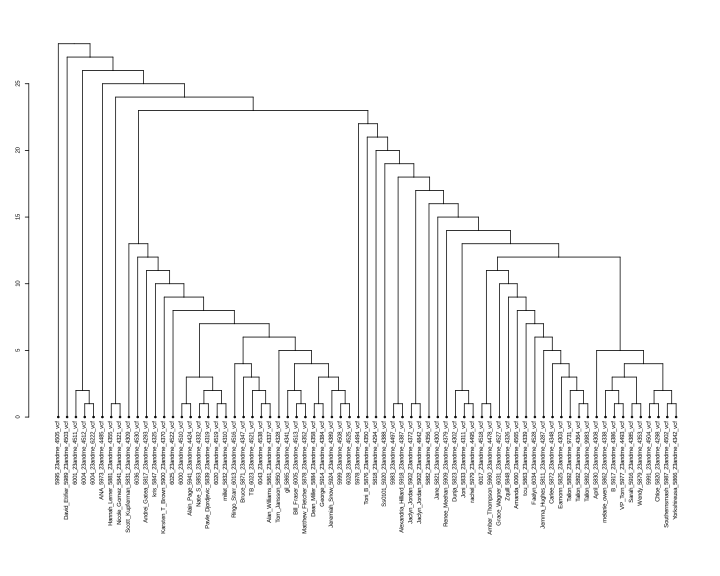

In [59]:
from IPython.display import SVG, display
display(SVG(filename="/content/dendrogram_rect.svg"))